<h1 style="color: #305250;">  Анализ заведений общественного питания Москвы: Инсайты и рекомендации для успешного открытия новых точек </h1>

- Автор:Мусабаева Алеся Талгатовна
- Дата:09.12.2024

### Цели и задачи проекта

<font color='#777778'> Цель проекта:
Провести анализ данных о заведениях общественного питания в Москве с целью выявления закономерностей и предоставления рекомендаций по открытию новых точек, а также детального изучения пиццерий как отдельной категории.

 Задачи включают предобработку данных: преобразование типов, обработку пропусков, устранение дубликатов и добавление новых признаков, таких как круглосуточность. На этапе анализа данных необходимо изучить распределение заведений по категориям и районам, определить особенности сетевых и несетевых заведений, проанализировать посадочные места, рейтинги и их взаимосвязи с другими характеристиками. Детальное исследование пиццерий позволит выявить их основные характеристики, распределение по районам и закономерности работы сетевых и несетевых точек. Итогом проекта станут рекомендации заказчику, основанные на выявленных инсайтах и аналитических выводах.
</font>

### Описание данных
<font color='#777778'>Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
-`seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
</font>

### Содержимое проекта

<font color='#777778'>
    
1. Загрузка данных и знакомство с ними 
- Изучение информации о заведениях    
- Изучение информации о среднем чеке
- Подготовка единого датафрейма    
2. Предобработка данных
3. Исследовательский анализ данных
4. Детальное исследование пиццерий
5. Итоговый вывод и рекомендации    

</font>


<h2 style="color: #62A39F;"> Загрузка данных и знакомство с ними
 </h2>


Начнём с загрузки библиотек и датасетов '/datasets/rest_info.csv' и '/datasets/rest_price.csv'. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: bank_df и clients_df.

In [78]:
#Импортируем библиотеку pandas
import pandas as pd

In [79]:
#Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install phik

In [80]:
# Загрузим библиотеку для расчета коэффициента корреляции
from phik import phik_matrix

In [81]:
# Выгружаем данные в переменные rest_df и price_df
rest_df=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

### Изучение информации о заведениях `rest_df`

In [82]:
#Выводим первые строки датафрейма на экран
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [83]:
#Выводим информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


### Изучение информации о заведениях `price_df`

In [84]:
#Выводим первые строки датафрейма на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [85]:
#Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


<font color='#777778'> Промежуточные выводы:
    
Датасет `rest_df` соедржит 9 стобцов и 8406 строк, в которых представлена информациюя о заведениях общественного питания. 

Особенности данных:

Пропуски в столбцах `hours` (часы работы) и `seats` (посадочные места). Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
Тип данных соответствует предполагаемым характеристикам для каждого столбца.
Числовые данные (rating, chain, seats) можно использовать для количественного анализа, а текстовые (category, district, hours) требуют проверки на уникальность и нормализации.
    
Датасет `price_df` соедржит 5 стобцов и 4058 строк, в которых представлена информациюя о заведениях общественного питания. 

Особенности данных:

- Присутствуют пропуски в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, особенно значительные в последнем. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Данные о среднем чеке `avg_bill`, `middle_avg_bill` представлены в текстовом и числовом формате, что требует проверки и согласования.
- Ценовая категория `price` — текстовое поле, требующее проверки на уникальность значений и, возможно, нормализации.
- Малое количество заполненных данных в middle_coffee_cup (13% от общего числа записей), что может затруднить анализ стоимости кофе.
- Типы данных корректны для анализа, однако столбцы с текстовыми значениями нуждаются в обработке и, возможно, в преобразовании.
</font>    


### Подготовка единого датафрейма


Использование левого объединения имеет смысл, т.к. основной датасет (информация о заведениях с id, category, district, rating и т.д.) является более полным, к нему будем добавитьлять дополнительные сведения (о ценовой категории или стоимости чашки кофе) из второго датасета. В таком случае все заведения из первого датасета сохраняются, а данные из второго датасета добавляются только для тех, которые совпадают по id. Нам важна полная информация по заведению, а пропуски в данных можно будет обработать позже.

In [86]:
# Соединяем данные в единый датафрейм df
df=rest_df.merge(price_df, on='id',how='left')

In [87]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [88]:
#Проверка размерности датасетов до объединения
display(f'Размер датасета price_df:{price_df.shape}')
display(f'Размер датасета rest_df:{rest_df.shape}')
display(f'Размер результирующего датафрейма df:{df.shape}')

'Размер датасета price_df:(4058, 5)'

'Размер датасета rest_df:(8406, 9)'

'Размер результирующего датафрейма df:(8406, 13)'

### Промежуточные выводы:
    
*Размер датасета price_df:(4058, 5)*

*Размер датасета rest_df:(8406, 9)*

*Размер результирующего датафрейма df:(8406, 13)*

Данные содержат 8406 записей с 13 столбцами. Из них 8 столбцов имеют строковый тип данных (object), 4 столбца — числовые (float64), и один столбец с целочисленным типом (int64).

Основные характеристики данных:

- Столбцы `id`, `name`, `category`, `address`, `district`, `rating`, `chain` содержат полные данные (8406 непустых значений).
- В столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` наблюдаются пропуски.
Этот набор данных можно использовать для дальнейшего анализа, но потребуется обработка пропусков для получения полного и корректного анализа.
    
Разделение столбцов по типам:
- Числовые: rating, chain, seats, middle_avg_bill, middle_coffee_cup
- Категориальные:category, district, price, avg_bill
- Текстовые:id, name, address,hours


<h2 style="color: #62A39F;"> Предобработка данных
</h2>
При первичном анализе мы обнаружили пропуски в столбцах датафрейма df. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [89]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [90]:
round(df.isna().sum()/df.shape[0]*100,2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

- `hours`,`price`  — Пропуски заполнены пропуски заглушкой "Не указано" 

- `avg_bill`  — Данные категоризованы в новый столбец  `bill_category` пропуски заменены на категорию "Не указано"  
    
- `hours` (6.38%) — Пропущены данные о времени работы заведения. Возможно, не все заведения указали время работы или оно не является обязательным для всех типов заведений.
Решение: Можно заполнить пропуски заглушкой "Не указано" 
- `seats` (42.96%) — Пропущено большое количество значений о количестве посадочных мест. Это может означать, что не все заведения предоставили эту информацию, или она не всегда актуальна.
Решение: Заменим на np.nan.
- `price` (60.56%) — Пропуски в ценовой категории могут возникать, если заведение не указало этот параметр.
Решение: Заменить пропуски на категорию "Не указано", добавить краткое описание категории 
-`avg_bill` (54.6%) — Пропуски могут быть связаны с тем, что средний чек не указан для всех заведений.
Решение: Заменить пропуски на категорию "Не указано"     
- `middle_avg_bill` (62.54%) — Пропущено большое количество значений, что может свидетельствовать о трудностях с точным вычислением среднего чека.
Решение: Заменим на np.nan.
-`middle_coffee_cup` (93.64%) — Очень большое количество пропусков в столбце, что может указывать на отсутствие данных для заведений, не предлагающих кофе или не указывающих стоимость чашки кофе.
Решение: Не является ключевые столбцов для анализа, можно убрать/удалить.    
</font>

*Преобразование категорий цены и вывод уникальных*

In [91]:
# Преобразуем данные в колонке avg_price в категории
def categorize(row):
    if pd.isna(row):
        return 'Не указано'
    elif 'Цена бокала пива' in row:
        return 'Цена бокала пива'
    elif 'Цена чашки капучино' in row:
        return 'Цена чашки капучино'
    elif 'Средний счёт' in row:
        return 'Средний счёт'
    else:
        return 'Неизвестная категория'

# Применяем функцию к колонке avg_price
df['bill_category'] = df['avg_bill'].apply(categorize)

# Печатаем результат
display(df[['avg_bill', 'bill_category']].head())

# Выводим уникальные значения из колонки avg_price
# Применяем функцию к колонке avg_bill
df['bill_category'] = df['avg_bill'].apply(categorize)


,avg_bill,bill_category
0,NaN,Не указано
1,Средний счёт:1500–1600 ₽,Средний счёт
2,Средний счёт:от 1000 ₽,Средний счёт
3,Цена чашки капучино:155–185 ₽,Цена чашки капучино
4,Средний счёт:400–600 ₽,Средний счёт


In [92]:
#Проверка данных
display('Распределение данных по столбцу middle_avg_bill:')
df['middle_avg_bill'].describe()

'Распределение данных по столбцу middle_avg_bill:'

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

In [93]:
#Проверка строк по минимальному значению
df[df['middle_avg_bill'] == 0].shape[0]

1

In [94]:
#Проверка строк по максимальному значениюбольше 3000
df[df['middle_avg_bill'] > 5000].shape[0]

11

*Замена пустых значений на заглушку*

In [95]:
#Проверяем уникальные значения
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [96]:
#Сохраняем старые значения для последующей фильтрации
df['hours_old']=df['hours']
#Заполняем пустоты заглушкой 
df['hours'].fillna('не указано',inplace=True)
#Отображаем измененные данные
changed_rows=df[df['hours_old'].isna()]
display(changed_rows[['hours_old','hours']].head())

,hours_old,hours
38,NaN,не указано
40,NaN,не указано
44,NaN,не указано
56,NaN,не указано
108,NaN,не указано


In [97]:
#Проверяем уникальные значения
display(df['price'].unique())

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [98]:
#Сохраняем старые значения для последующей фильтрации
df['price_old']=df['price']
#Заполняем пустоты заглушкой 
df['price'].fillna('не указано',inplace=True)
#Отображаем измененные данные
changed_rows=df[df['price_old'].isna()]
display(changed_rows[['price_old','price']].head())


,price_old,price
0,NaN,не указано
3,NaN,не указано
11,NaN,не указано
13,NaN,не указано
19,NaN,не указано


In [99]:
# Удаляем промежуточный столбец
df.drop(columns=['avg_bill','price_old','hours_old'],inplace=True)

In [100]:
# Выводим количество пропущенных строк в датафрейме после обработки данных
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
middle_avg_bill      5257
middle_coffee_cup    7871
bill_category           0
dtype: int64

<font color='#777778'> Промежуточные выводы:
- `hours`,`price`  — Пропуски заполнены пропуски заглушкой "Не указано" 

- `avg_bill`  — Данные категоризованы в новый столбец  `bill_category` пропуски заменены на категорию "Не указано"
- В колонках: `seats`, `middle_avg_bill` - пропуски оставлены без изменений     
</font>    

### Явные и неявные дубликаты в данных
Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [101]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum()

0

*В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты — значения по id  должны быть уникальными, то есть каждая строка в данных — уникальное заведение:*

In [102]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

*Тут тоже всё хорошо — каждая строка соответствует уникальному клиенту. Теперь проверим корректность написания категориальных значений*

In [103]:
# Список замен
replacements = [
    ('Яндекс.Лавка', 'Яндекс Лавка'),
    ('Хлеба&Зрелищ', 'Хлеба&Зрелищ пиццерия'),
    ('Хинкали-Gали!', 'Хинкали - Gали!'),
    ('9 Bar Coffe', '9 Bar Coffee'),
    ('Чайхона №1', 'Чайхона № 1')
]

# Проходим по каждой замене
for old_value, new_value in replacements:
    before_count = (df['name'] == old_value).sum()  # Считаем количество строк до замены
    df['name'] = df['name'].replace(old_value, new_value)  # Выполняем замену
    display(f'Количество измененных строк для "{old_value}" -> "{new_value}": {before_count}')


'Количество измененных строк для "Яндекс.Лавка" -> "Яндекс Лавка": 3'

'Количество измененных строк для "Хлеба&Зрелищ" -> "Хлеба&Зрелищ пиццерия": 1'

'Количество измененных строк для "Хинкали-Gали!" -> "Хинкали - Gали!": 5'

'Количество измененных строк для "9 Bar Coffe" -> "9 Bar Coffee": 1'

'Количество измененных строк для "Чайхона №1" -> "Чайхона № 1": 5'

In [104]:
#Выведем уникальные значения по столбцам
df['name'].unique()
df['address'].unique()

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'], dtype=object)

In [105]:
# Преобразование текста в столбцах 'name' и 'address'
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()

In [106]:
# Проверяем неявные дубликаты в датафрейме df
duplicates_count = df.duplicated(subset=['name','address']).sum()
display(f"Количество дубликатов: {duplicates_count}")
# Удаляем дубликаты
df_cleaned = df.drop_duplicates(subset=['name', 'address'])

# Проверяем размеры после удаления
display(f"Размер датафрейма после удаления дубликатов: {df_cleaned.shape}")

'Количество дубликатов: 4'

'Размер датафрейма после удаления дубликатов: (8402, 13)'

In [107]:
for column in ['category', 'district','hours', 'price', 'bill_category']:
    display(f'Уникальные значения в столбцу {column}:')
    display(df[column].sort_values().unique())
    display()

'Уникальные значения в столбцу category:'

array(['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

'Уникальные значения в столбцу district:'

array(['Восточный административный округ',
       'Западный административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Центральный административный округ',
       'Юго-Восточный административный округ',
       'Юго-Западный административный округ',
       'Южный административный округ'], dtype=object)

'Уникальные значения в столбцу hours:'

array(['Нет информации',
       'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30',
       'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00',
       ..., 'чт 20:00–02:00; пт,сб 20:00–06:00',
       'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно',
       'чт-вс 20:00–06:00'], dtype=object)

'Уникальные значения в столбцу price:'

array(['высокие', 'выше среднего', 'не указано', 'низкие', 'средние'],
      dtype=object)

'Уникальные значения в столбцу bill_category:'

array(['Не указано', 'Средний счёт', 'Цена бокала пива',
       'Цена чашки капучино'], dtype=object)

*Ошибок не выявлено*

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [108]:
# Выводим все уникальные значения столбца 'hours'
df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [109]:
# Преобразуем данные в колонке hours  в новый столбец
def categorize(row):
    if pd.isna(row):
        return False
    elif 'ежедневно, круглосуточно' in row:
        return True
    else:
        return False

# Применяем функцию к колонке avg_price
df['is_24_7'] = df['hours'].apply(categorize)

# Печатаем результат
display(df[['hours', 'is_24_7']].head())


,hours,is_24_7
0,"ежедневно, 10:00–22:00",False
1,"ежедневно, 10:00–22:00",False
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",False
3,"ежедневно, 09:00–22:00",False
4,"ежедневно, 10:00–22:00",False


In [110]:
# Подсчитываем количество уникальных значений в столбце 'is_24_7'
display(df['is_24_7'].value_counts())
display()

df_hours = df[df['hours'] == 'ежедневно, круглосуточно']

# Подсчитываем количество строк в отфильтрованном DataFrame
count = df_hours.shape[0]  # или len(df_hours)

# Печатаем количество строк
display(count)

False    7676
True      730
Name: is_24_7, dtype: int64

730

<font color='#777778'> Промежуточные выводы:
1. Внесены изменения в наименования строк:
- 'Количество измененных строк для "Яндекс.Лавка" -> "Яндекс Лавка": 3'
- 'Количество измененных строк для "Хлеба&Зрелищ" -> "Хлеба&Зрелищ пиццерия": 1'
- 'Количество измененных строк для "Хинкали-Gали!" -> "Хинкали - Gали!": 5'
- 'Количество измененных строк для "9 Bar Coffe" -> "9 Bar Coffee": 1'
- 'Количество измененных строк для "Чайхона №1" -> "Чайхона № 1": 5'

2. В датафрейме не обнаружены полные дубликаты строк. 
3. Удалены 4 дубликата в колонках `name`, `address`
4. Для дальнейшей работы был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно (24/7): True — если заведение работает ежедневно и круглосуточно. False — если заведение не работает круглосуточно.
</font>  

### Промежуточные выводы:
    
- `hours`,`price`  — Пропуски заполнены пропуски заглушкой "Не указано" 
- `avg_bill`  — Данные категоризованы в новый столбец  `bill_category` пропуски заменены на категорию "Не указано"     
- В колонках: `seats`, `middle_avg_bill` - пропуски оставлены без изменений 

Проверка данных:

- В датафрейме обнаружены дубликаты строкпо колнках `name','address'-4строки были удалены из датасета.
- Проверка по ID: Значения по ID уникальны, то есть каждая строка в данных соответствует уникальному заведению.
- Проверка категориальных значений: Нет явных ошибок в написании категориальных значений.
    
- Для дальнейшей работы был создан столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно (24/7):
True — если заведение работает ежедневно и круглосуточно.
False — если заведение не работает круглосуточно.    

Краткий вывод по статистике столбца `middle_avg_bill`-данные говорят о том, что большинство значений находятся в диапазоне от 0 до 1,250, а также присутствуют выбросы с очень высокими значениями (до 35,000) и сомнительными значениями в 0.

Рекомендация использвать единый классификатор сети или id

<h2 style="color: #62A39F;"> Исследовательский анализ данных
</h2>

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

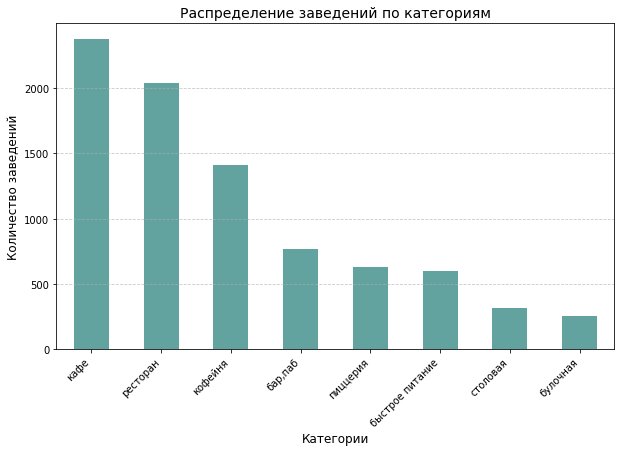

In [111]:
# Подсчёт количества объектов по категориям
category_counts = df['category'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='#62A39F')
plt.title('Распределение заведений по категориям', fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [112]:
# Считаем общее количество заведений
total_count = category_counts.sum()

# Создаём DataFrame с результатами
result_table = pd.DataFrame({
    'Категория': category_counts.index,
    'Количество заведений': category_counts.values,
    'Доля': np.round((category_counts.values / total_count) * 100,0)  # Рассчитываем долю
})

# Печатаем таблицу в консоль
display(result_table)

,Категория,Количество заведений,Доля
0,кафе,2378,28.0
1,ресторан,2043,24.0
2,кофейня,1413,17.0
3,"бар,паб",765,9.0
4,пиццерия,633,8.0
5,быстрое питание,603,7.0
6,столовая,315,4.0
7,булочная,256,3.0


<font color='#777778'>Промежуточные выводы: Количество заведений по категориям:

Кафе и рестораны доминируют среди объектов общественного питания, составляя более 50% от общего числа заведений, в то время как категории, такие как столовые и булочные, имеют меньшую представленность на рынке
</font>    

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

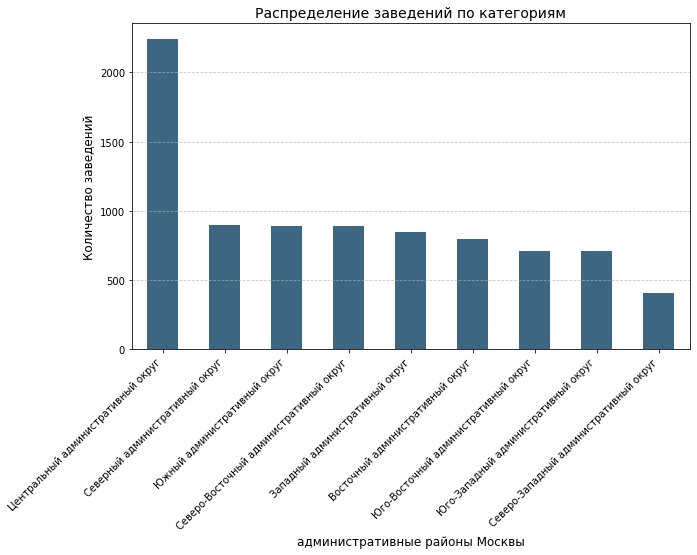

In [113]:
# Подсчёт количества объектов по категориям
district_counts = df['district'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
district_counts.plot(kind='bar', color='#3C6682')
plt.title('Распределение заведений по категориям', fontsize=14)
plt.xlabel('административные районы Москвы', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [114]:
# Подсчёт количества объектов по районам
district_counts = df['district'].value_counts()

# Расчёт относительных значений
relative_counts = district_counts / district_counts.sum() * 100

# Создание таблицы с результатами
district_table = pd.DataFrame({
    'Административный район': district_counts.index,
    'Количество заведений': district_counts.values,
    'Доля (%)': relative_counts.round(2)  # Округление до 2 знаков после запятой
})

# Печатаем таблицу
display(district_table)

,Административный район,Количество заведений,Доля (%)
Центральный административный округ,Центральный административный округ,2242,26.67
Северный административный округ,Северный административный округ,900,10.71
Южный административный округ,Южный административный округ,892,10.61
Северо-Восточный административный округ,Северо-Восточный административный округ,891,10.60
Западный административный округ,Западный административный округ,851,10.12
Восточный административный округ,Восточный административный округ,798,9.49
Юго-Восточный административный округ,Юго-Восточный административный округ,714,8.49
Юго-Западный административный округ,Юго-Западный административный округ,709,8.43
Северо-Западный административный округ,Северо-Западный административный округ,409,4.87


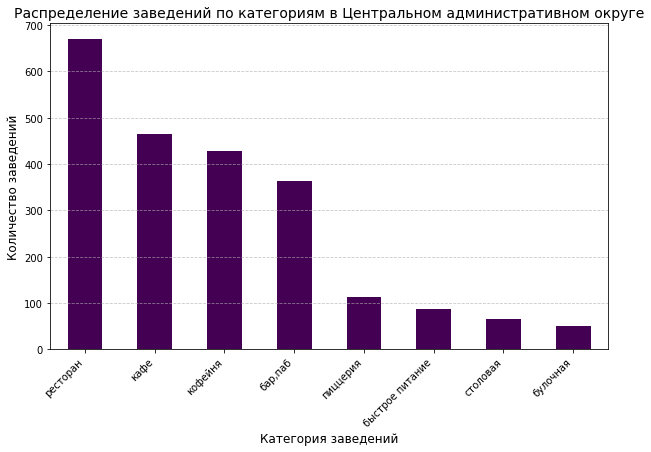

In [115]:
# Фильтрация данных для Центрального административного округа
central_district = df[df['district'] == 'Центральный административный округ']

# Подсчёт количества заведений по категориям в Центральном административном округе
category_in_central = central_district['category'].value_counts()

# Построение столбчатой диаграммы для категорий заведений в Центральном административном округе
plt.figure(figsize=(10, 6))
category_in_central.plot(kind='bar', color='#440154')
plt.title('Распределение заведений по категориям в Центральном административном округе', fontsize=14)
plt.xlabel('Категория заведений', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [116]:
# Фильтрация данных для всех кроме Центрального административного округа
no_central_district = df[df['district'] != 'Центральный административный округ']

# Группируем данные по категориям заведений и подсчитываем количество заведений в каждой категории
category_in_central = central_district['category'].value_counts()
category_no_central= no_central_district['category'].value_counts()
# Расчёт относительных значений в ЦАО
central_relative = category_in_central / category_in_central.sum() * 100
no_central_relative=category_no_central/category_no_central.sum()*100
# Создаём таблицу с результатами
category_table_central = pd.DataFrame({
    'Категория': category_in_central.index,
    'Количество заведений': category_in_central.values,
    'Доля в ЦАО (%)': central_relative.round(2)
})
category_table_no_central = pd.DataFrame({
    'Категория': category_no_central.index,
    'Количество заведений': category_no_central.values,
    'Доля без ЦАО (%)': no_central_relative.round(2)
})
# Печатаем таблицу
display(category_table_central)
display(category_table_no_central)

,Категория,Количество заведений,Доля в ЦАО (%)
ресторан,ресторан,670,29.88
кафе,кафе,464,20.70
кофейня,кофейня,428,19.09
"бар,паб","бар,паб",364,16.24
пиццерия,пиццерия,113,5.04
быстрое питание,быстрое питание,87,3.88
столовая,столовая,66,2.94
булочная,булочная,50,2.23


,Категория,Количество заведений,Доля без ЦАО (%)
кафе,кафе,1914,31.05
ресторан,ресторан,1373,22.27
кофейня,кофейня,985,15.98
пиццерия,пиццерия,520,8.44
быстрое питание,быстрое питание,516,8.37
"бар,паб","бар,паб",401,6.51
столовая,столовая,249,4.04
булочная,булочная,206,3.34


<font color='#777778'> Промежуточные выводы:
- В Центральном административном округе Москвы сосредоточено наибольшее количество заведений (2242, 27%), а наименьшее количество заведений наблюдается в Северо-Западном административном округе (409, 5%).    
- В Центральном административном округе (ЦАО) преобладают рестораны (29.88%), кафе (20.70%) и кофейни (19.09%), что отражает высокий спрос на разнообразные форматы заведений. 
- В целом по городу(без  ЦАО) лидируют кафе (31.05%), рестораны (22.27%) и кофейни (15.98%), демонстрируя схожие предпочтения, но с чуть большим акцентом на кафе.
    
</font>    

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

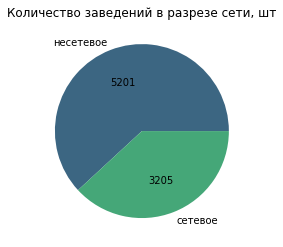

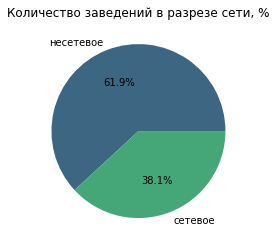

In [117]:
chain_counts = df.groupby('chain').size().reset_index(name='count')

# Используем палитру 'viridis' для цветов
colors = ['#3C6682', '#45A778'] 

# Построение круговой диаграммы
ax = chain_counts.plot(kind='pie',
       x='chain',
        labels=chain_counts['chain'].replace({0: 'несетевое', 1: 'сетевое'}),  # Заменяем метки
        autopct=lambda p: '{:.0f}'.format(p * sum(chain_counts['count']) / 100),           
        y='count',
        legend=False,
        colors=colors)
# Заголовок и подписи       
plt.title('Количество заведений в разрезе сети, шт')
# Убираем подписи осей
ax.set_ylabel('')  # Убираем подпись оси Y
ax.set_xlabel('')  # Убираем подпись оси X
plt.show()
# Построение круговой диаграммы в %
ax=chain_counts.plot(kind='pie',
        x='chain',
        labels=chain_counts['chain'].replace({0: 'несетевое', 1: 'сетевое'}),  # Заменяем метки
        autopct='%1.1f%%',           
        y='count',
        legend=False,
        colors=colors)
# Заголовок и подписи       
plt.title('Количество заведений в разрезе сети, %')
# Убираем подписи осей
ax.set_ylabel('')  # Убираем подпись оси Y
ax.set_xlabel('')  # Убираем подпись оси X
plt.show()

In [118]:
# Считаем количество объектов по категориям и сетям
category_chain_counts = df.groupby(['category', 'chain']).size().reset_index(name='count')

pivot_category_chain=pd.pivot_table(category_chain_counts,
                                    values='count',
                                    index='category',
                                    columns='chain',
                                    aggfunc='sum'
)
# Рассчитываем общее количество заведений по категориям
pivot_category_chain['total'] = pivot_category_chain.sum(axis=1)

# Рассчитываем долю несетевых заведений
pivot_category_chain['chain0_share'] = pivot_category_chain[0] / pivot_category_chain['total'] * 100

# Рассчитываем долю сетевых заведений
pivot_category_chain['chain1_share'] = pivot_category_chain[1] / pivot_category_chain['total'] * 100

# Отображаем таблицу
display(pivot_category_chain)

chain,0,1,total,chain0_share,chain1_share
category,,,,,
"бар,паб",596,169,765,77.908497,22.091503
булочная,99,157,256,38.671875,61.328125
быстрое питание,371,232,603,61.525705,38.474295
кафе,1599,779,2378,67.241379,32.758621
кофейня,693,720,1413,49.044586,50.955414
пиццерия,303,330,633,47.867299,52.132701
ресторан,1313,730,2043,64.268233,35.731767
столовая,227,88,315,72.063492,27.936508


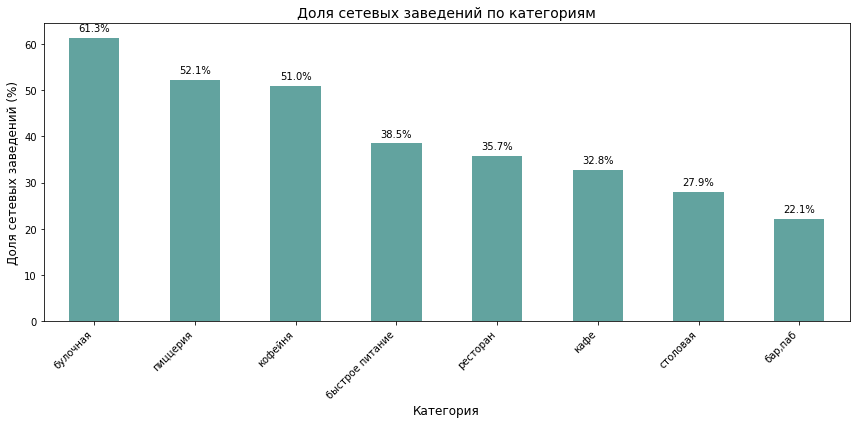

In [119]:
# Создаем новую таблицу с нужными столбцами
sorted_chain1_share = pivot_category_chain[['chain1_share']].reset_index()

# Сортируем таблицу по доле сетевых заведений (chain1_share) в порядке убывания
sorted_chain1_share = sorted_chain1_share.sort_values(by='chain1_share', ascending=False)

# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Строим график доли сетевых заведений по категориям
# Используем 'category' на оси X и 'chain1_share' на оси Y
sorted_chain1_share.set_index('category', inplace=True)
sorted_chain1_share['chain1_share'].plot(kind='bar', color='#62A39F')

# Заголовок и подписи
plt.title('Доля сетевых заведений по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доля сетевых заведений (%)', fontsize=12)

# Поворот подписей на оси X для удобства
plt.xticks(rotation=45, ha='right')

# Добавляем подписи на столбики с долей
for i, v in enumerate(sorted_chain1_share['chain1_share']):
    plt.text(i, v + 1, f"{v:.1f}%", color='black', ha='center', va='bottom', fontsize=10)

# Показать график
plt.tight_layout()
plt.show()

In [120]:
pivot_category_chain=pd.pivot_table(df,values='id',
                                    index='category',
                                    columns='chain',
                                   aggfunc='count')
display(pivot_category_chain)

chain,0,1
category,,
"бар,паб",596,169
булочная,99,157
быстрое питание,371,232
кафе,1599,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,730
столовая,227,88


<font color='#777778'> Промежуточные выводы:
- Соотношение сетевых и несетевых заведений в целом по всем данным (62:38 или в количественном выражении 5201 несетевых заведений к 3205 сетевым).    
- Таким образом, наибольшая доля сетевых заведений наблюдается в категориях булочная и пиццерия, в то время как в таких категориях как бар, паб и столовая преобладают несетевые заведения.
</font>    

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [121]:
df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

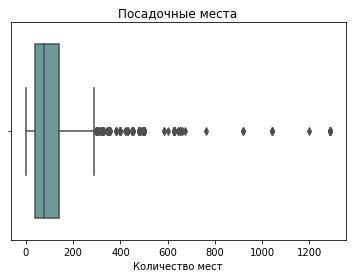

In [122]:
sns.boxplot(data=df,
           x='seats',color='#62A39F')
# Заголовок и подписи
plt.title('Посадочные места')
plt.xlabel('Количество мест')
plt.show()

- Среднее количество сидячих мест: 93.5 — это среднее количество мест, которое заведения предоставляют своим посетителям.
- Стандартное отклонение: 95.1 — говорит о большой вариативности количества мест в заведениях (от небольших кафе до крупных ресторанов с большими залами).
- Большинство заведений имеют относительно небольшое количество мест, но существует значительная вариативность, с заведениям, предоставляющими как минимум 0 мест, так и до 1288 мест.
- Среднее количество сидячих мест около 93, что указывает на то, что большинство заведений имеют умеренный размер залов.

In [123]:
# Посчитаем количество уникальных  заведений для каждого значения столбца seats
display('Распределение заведений по значениям столбца seats:')
df.groupby('seats')['id'].nunique()

'Распределение заведений по значениям столбца seats:'

seats
0.0       136
1.0         4
2.0        15
3.0        13
4.0        25
         ... 
760.0       1
920.0       2
1040.0      4
1200.0      1
1288.0     11
Name: id, Length: 229, dtype: int64

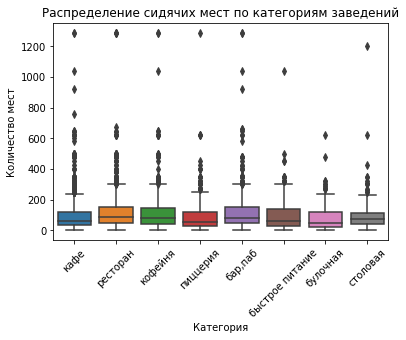

In [124]:
#выявления выбросов и распределения сидячих мест по заведениям
sns.boxplot(x='category', y='seats', data=df)
plt.title('Распределение сидячих мест по категориям заведений')
# Поворачиваем подписи на оси X
plt.xticks(rotation=45)
# Заголовок и подписи
plt.xlabel('Категория') 
plt.ylabel('Количество мест') 
plt.show()

Для приведения для каждой категории заведений наиболее типичное для него количество посадочных мест используем IQR - отражает разброс данных, где 50% заведений из каждой категории имеют количество посадочных мест в пределах этого диапазона (между 25% и 75% процентилями).

In [125]:
# Группируем по категории и вычисляем 25-й и 75-й процентиль
q25 = df.groupby('category')['seats'].quantile(0.25)
q50= df.groupby('category')['seats'].quantile(0.5)
q75 = df.groupby('category')['seats'].quantile(0.75)

# Вычисляем IQR как разницу между 75-м и 25-м процентилями
iqr_by_category = q75 - q25
# Вычисляем границы для удаления выбросов
lower_bound = q25 - 1.5 * iqr_by_category
upper_bound = q75 + 1.5 * iqr_by_category

# Создаём таблицу с результатами
iqr_table = pd.DataFrame({
    '25-й перцентиль': q25,
    '50-й перцентиль': q50,
    '75-й перцентиль': q75,
    'IQR': iqr_by_category  
})

# Выводим таблицу
display(iqr_table)

,25-й перцентиль,50-й перцентиль,75-й перцентиль,IQR
category,,,,
"бар,паб",48.00,82.5,150.0,102.00
булочная,25.00,50.0,120.0,95.00
быстрое питание,28.00,65.0,140.0,112.00
кафе,35.25,60.0,120.0,84.75
кофейня,40.00,80.0,144.0,104.00
пиццерия,30.00,55.0,120.0,90.00
ресторан,48.00,86.0,150.0,102.00
столовая,40.00,75.5,117.0,77.00


In [126]:
# Вычисляем границы выбросов на основе IQR
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

# Убираем выбросы
df_no_outliers = df[(df['seats'] >= lower_bound) & (df['seats'] <= upper_bound)]

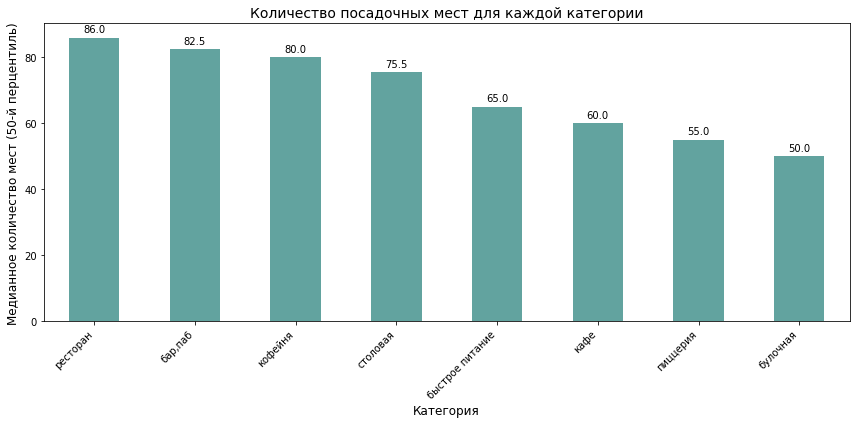

In [127]:
# Группируем по категории и вычисляем медиану
q50 = df.groupby('category')['seats'].quantile(0.5)

# Создаём таблицу с результатами
median_table = pd.DataFrame({
    '50-й перцентиль': q50,
})

# Сортируем таблицу по значениям медианы (50-й перцентиль)
median_table_sorted = median_table.sort_values(by='50-й перцентиль', ascending=False)


# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
median_table_sorted['50-й перцентиль'].plot(kind='bar', color='#62A39F')

# Заголовок и подписи
plt.title('Количество посадочных мест для каждой категории', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Медианное количество мест (50-й перцентиль)', fontsize=12)

# Поворот подписей на оси X для удобства
plt.xticks(rotation=45, ha='right')

# Добавляем подписи на столбики
for i, v in enumerate(median_table_sorted['50-й перцентиль']):
    plt.text(i, v + 1, f"{v:.1f}", color='black', ha='center', va='bottom', fontsize=10)

# Показать график
plt.tight_layout()
plt.show()


In [128]:
#Вывод процентиля на экран
display(f"95 процентиль:{df['seats'].quantile(0.95)}")
display(f"99 процентиль:{df['seats'].quantile(0.99)}")

'95 процентиль:307.0'

'99 процентиль:625.0'

<font color='#777778'> Промежуточные выводы:

- Для большинства категорий заведений есть выбросы сидячих мест, что видно по точкам за пределами усов (верхние и нижние выбросы).
- Некоторые категории имеют значительные выбросы, например, для кафе и ресторанов количество сидячих мест в отдельных случаях сильно превышает 1000.
-Категории с более высоким значением IQR (например, "быстрое питание" или "булочная") демонстрируют более широкий разброс значений количества посадочных мест.

Что могут значить выбросы?
Выбросы могут указывать на наличие крупных заведений, которые могут быть исключениями среди основной массы заведений.
Это также может означать ошибки в данных, если такие экстремальные значения не соответствуют реальной практике.  
    
Рекомендации:

Возможно, стоит исследовать выбросы более детально, чтобы понять их происхождение: это реальные данные или ошибки.
Для анализа можно исключить выбросы (например, значения, превышающие 95-й процентиль), чтобы получить более точное представление о распределении сидячих мест для большинства заведений.    

Медианные значения

- Медианные значения в категории "ресторан", "бар, паб" и "ресторан" демонстрируют более высокие показатели по сравнению с другими категориями, что характерно для заведений с большим количеством посадочных мест.
- "Булочная", "пиццерия" и "быстрое питание" имеют более низкие медианные значения, что связано с их форматом обслуживания и ограниченной площадью для посетителей.
- "Кафе" и "кофейня" оказываются между этими крайностями, показывая средний размер посадочных мест.    

</font>

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [129]:
#Изучим детальны по столбцу рейтинг
df['rating'].describe()

count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

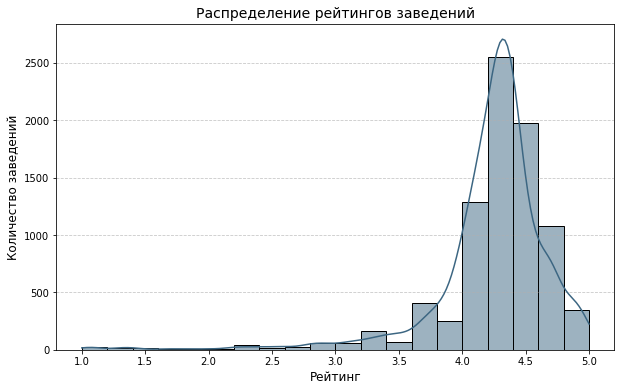

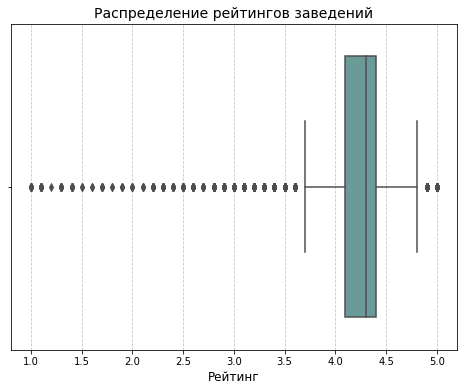

In [130]:
# Построим гистограмму распределения рейтингов
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True,  color='#3C6682')
plt.title('Распределение рейтингов заведений', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Построим boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='rating', color='#62A39F')
plt.title('Распределение рейтингов заведений', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

category
быстрое питание    4.050249
кафе               4.123886
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290357
пиццерия           4.301264
бар,паб            4.387712
Name: rating, dtype: float64

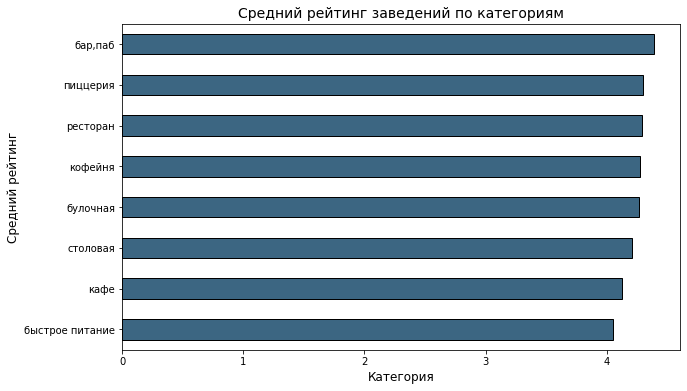

In [131]:
# Вычисляем средний рейтинг по категориям
avg_rating=df.groupby('category')['rating'].mean()
avg_rating=avg_rating.sort_values()
display(avg_rating)
#Построим график среднего рейтинга по заведениям
avg_rating.plot(kind='barh',figsize=(10, 6), color='#3C6682', edgecolor='black'
       )
plt.title('Средний рейтинг заведений по категориям', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.show()

<font color='#777778'> Промежуточные выводы:
- Средний рейтинг (mean): 4.23. Это говорит о том, что большинство заведений имеют довольно высокую оценку.
- Большинство заведений имеют хорошие рейтинги, сосредоточенные в диапазоне 4.1–4.4.
- Есть немногочисленные заведения с очень низкими (1) или очень высокими (5) оценками, что может указывать на их исключительное качество или недовольство клиентов.
- Различия между категориями небольшие: большинство оценок сосредоточены в узком диапазоне 4.05–4.39.
- Наиболее высокие рейтинги у баров и пабов (4.39), а также пиццерий (4.30), что может быть связано с их атмосферой и популярностью.
- Самая низкая оценка у заведений быстрого питания (4.05), что объясняется массовостью и меньшим акцентом на индивидуальный подход.
- Поскольку у нас фиксированная шкала (от 0 до 5), то выборосов не может быть.
</font>

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

,category,district,rating,chain,seats,price,middle_avg_bill,middle_coffee_cup,bill_category,is_24_7
category,1.000000,0.174326,0.190003,0.265627,0.048186,0.329543,0.053513,0.000000,0.755881,0.244789
district,0.174326,1.000000,0.200691,0.064233,0.352496,0.203078,0.056558,0.365314,0.148076,0.076392
rating,0.190003,0.200691,1.000000,0.108092,0.000000,0.281294,0.211868,0.000000,0.206286,0.150173
chain,0.265627,0.064233,0.108092,1.000000,0.056563,0.088850,0.046206,0.752859,0.130500,0.043414
seats,0.048186,0.352496,0.000000,0.056563,1.000000,0.019638,0.045217,0.000000,0.038904,0.043278
price,0.329543,0.203078,0.281294,0.088850,0.019638,1.000000,0.316026,0.000000,0.542802,0.063602
middle_avg_bill,0.053513,0.056558,0.211868,0.046206,0.045217,0.316026,1.000000,NaN,NaN,0.046124
middle_coffee_cup,0.000000,0.365314,0.000000,0.752859,0.000000,0.000000,NaN,1.000000,NaN,0.244332
bill_category,0.755881,0.148076,0.206286,0.130500,0.038904,0.542802,NaN,NaN,1.000000,0.116868
is_24_7,0.244789,0.076392,0.150173,0.043414,0.043278,0.063602,0.046124,0.244332,0.116868,1.000000


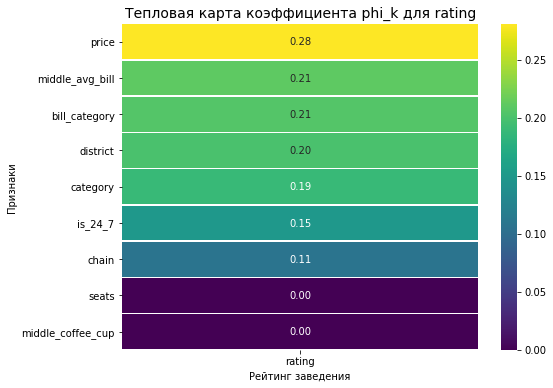

In [132]:
# Вычисляем корреляцию для числовых столбцов
correlation_matrix = df.corr()

# Исключаем столбцы с большим количеством уникальных значений
columns_to_exclude = ['id', 'name', 'address', 'hours']
filtered_df = df.drop(columns=columns_to_exclude, errors='ignore')

# Указываем интервальные столбцы, если есть числовые данные
interval_cols = ['rating', 'chain', 'seats', 'middle_avg_bill']

# Вычисляем phi_k матрицу
correlation_matrix = filtered_df.phik_matrix(interval_cols=interval_cols)
display(correlation_matrix)
# Отображаем тепловую карту
plt.figure(figsize=(8, 6))
data_heatmap = correlation_matrix[['rating']].drop(index='rating').sort_values(by='rating', ascending=False)

sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='viridis', 
            linewidths=0.5, 
            cbar=True)

plt.title('Тепловая карта коэффициента phi_k для rating', fontsize=14)
plt.xlabel('Рейтинг заведения')
plt.ylabel('Признаки')
plt.yticks(rotation=0)
# Вывод графика
plt.show()

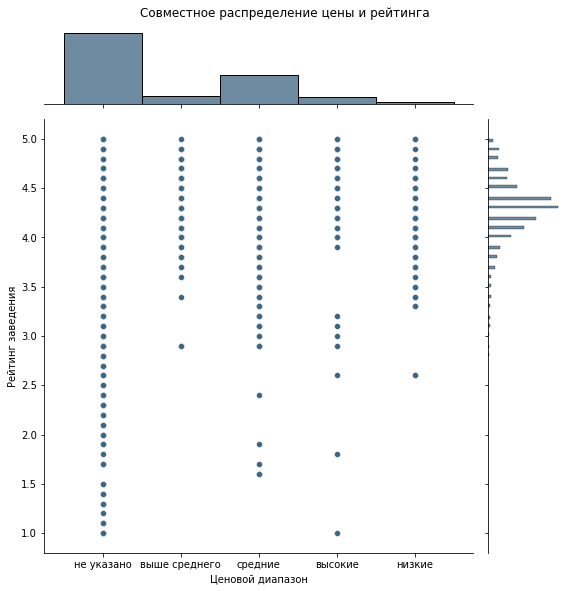

In [133]:
# Увеличиваем размер графика
g = sns.jointplot(x='price', y='rating', data=df, color='#3C6682', height=8)

# Добавляем заголовок
g.fig.suptitle('Совместное распределение цены и рейтинга', y=1.02)

# Настроим подписи оси X и Y
g.set_axis_labels('Ценовой диапазон', 'Рейтинг заведения')


# Показываем график
plt.show()

- Ценовой диапазон: большинство заведений попадает в категории с низкими и средними ценами, что также поддерживается гистограммой.
- Рейтинг заведений: наибольшее количество заведений имеет рейтинг 2.5-4.5. Однако есть также ряд заведений с рейтингом ниже 2, особенно среди заведений с более высокими ценами.
- Точки: В диаграмме рассеяния видно, что заведения с высокими ценами часто имеют более высокие рейтинги, в то время как заведения с низкими ценами распределяются по более широкому диапазону рейтингов.

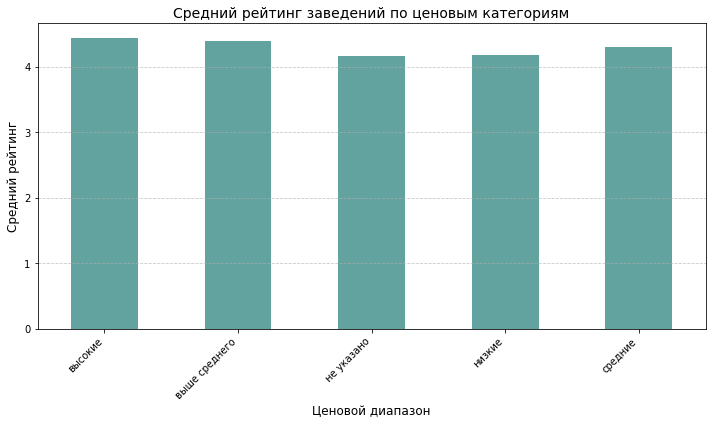

In [134]:
# Группировка по ценовым категориям и вычисление среднего рейтинга
average_rating_by_price = df.groupby('price')['rating'].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
average_rating_by_price.plot(kind='bar', color='#62A39F')

# Настройка графика
plt.title('Средний рейтинг заведений по ценовым категориям', fontsize=14)
plt.xlabel('Ценовой диапазон', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<font color='#777778'> Промежуточные выводы:
    
Корреляционная матрица с коэффициентом phi_k для переменной rating показывает, как различным признакам заведения коррелирует значение рейтинга. Вот основные выводы:

- `price` (0.281) — существует слабая связь между ценовой категорией и рейтингом заведения. Это означает, что более дорогие заведения, вероятно, имеют немного более высокий рейтинг, хотя связь и не слишком сильная.

- `district` (0.200) — есть слабая  корреляция между районом и рейтингом. Это может означать, что заведения в определенных районах могут получать чуть выше оценки, хотя эта связь не является высокой.

- `category` (0.190) — существует слабая  связь между категорией заведения и его рейтингом. Некоторые категории, возможно, в среднем получают более высокие оценки, но связь не сильная.

- `is_24_7` (0.150) — связь между круглосуточной работой заведения и рейтингом также слабая, но все же существует. Круглосуточные заведения имеют немного более высокий рейтинг в среднем.

- `chain` (0.108) — минимальная корреляция между типом заведения (сетевое или нет) и его рейтингом. Это свидетельствует о том, что сетевые заведения имеют, как правило, немного более высокие оценки.

- `seats` (0.000) — нет никакой корреляции между количеством посадочных мест и рейтингом заведения. Количество мест не влияет на рейтинг.

В целом, видно, что с рейтингом более сильно связаны price, district и category, а количество посадочных мест и сетевой статус почти не влияют на рейтинг заведения.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [135]:
# Фильтруем данные для сетевых заведений (chain == 1)
filtered_df = df[df['chain'] == 1]

# Создаем сводную таблицу по категории и названию заведения с агрегацией по количеству записей и среднему рейтингу
pivot_chain = pd.pivot_table(filtered_df, 
                             values=['id', 'rating'], 
                             index=['name', 'category'], 
                             aggfunc={'id': 'count', 'rating': 'mean'})

# Сортируем по количеству заведений (по индексу 'id', который является числовым)
pivot_chain_sorted = pivot_chain.sort_values(by='id', ascending=False)

# Ограничиваем результат до топ-15
pivot_chain_sorted_top15 = pivot_chain_sorted.head(15)
# Выводим топ-15 самых популярных сетевых заведений
display(pivot_chain_sorted_top15)

,,id,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
яндекс лавка,ресторан,72,3.855556
one price coffee,кофейня,71,4.064789
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


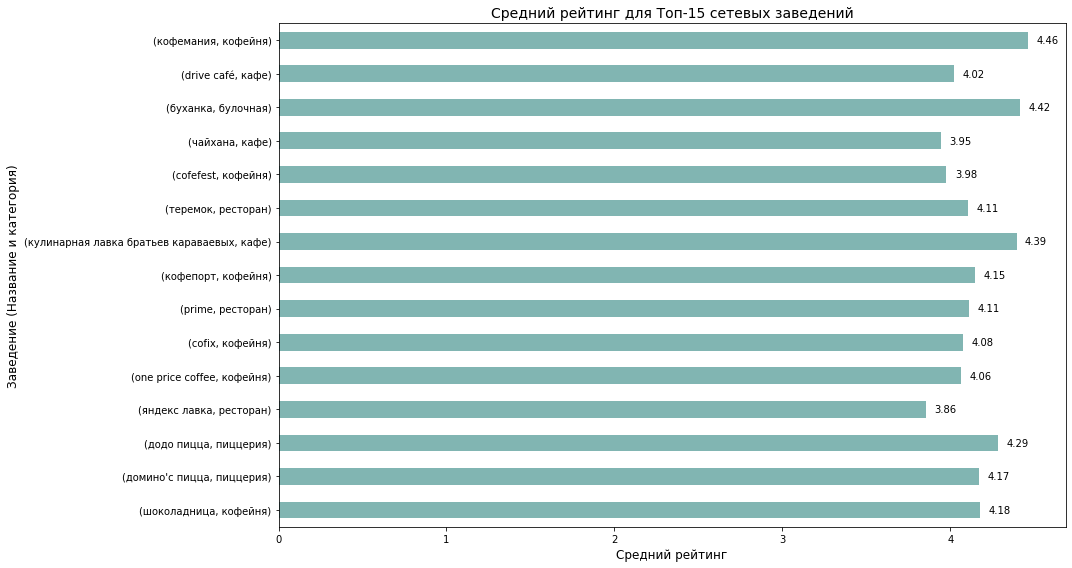

In [136]:
#Построим график 'Средний рейтинг для Топ-15 сетевых заведений'
# Устанавливаем размер графика
plt.figure(figsize=(15, 8))

# Строим горизонтальную столбчатую диаграмму
pivot_chain_sorted_top15['rating'].plot(kind='barh', color='#62A39F', alpha=0.8)

# Заголовок и подписи осей
plt.title('Средний рейтинг для Топ-15 сетевых заведений', fontsize=14)
plt.xlabel('Средний рейтинг', fontsize=12)
plt.ylabel('Заведение (Название и категория)', fontsize=12)

# Добавляем подписи значений на столбики
for i, v in enumerate(pivot_chain_sorted_top15['rating']):
    plt.text(v + 0.05, i, f"{v:.2f}", color='black', va='center', fontsize=10)

# Оптимизируем расположение элементов
plt.tight_layout()

# Показываем график
plt.show()

<font color='#777778'> Промежуточные выводы:
- Большинство сетей представляют категории кофейня и пиццерия, что характерно для современных трендов в ресторанной индустрии, где кофейни и пиццерии популярны среди потребителей.
- Рестораны, такие как Prime и Яндекс Лавка, демонстрируют более разнообразные меню, но их рейтинг может быть ниже, чем у заведений категории "кофейня", что требует дополнительного анализа.

Вывод: популярность и качество заведения могут быть связаны, а также указать на то, что сетевые заведения не всегда показывают лучший результат по качеству.
</font>    

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [137]:
#Изучим детальны по столбцу рейтинг
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Text(0.5, 0, 'Средний чек')

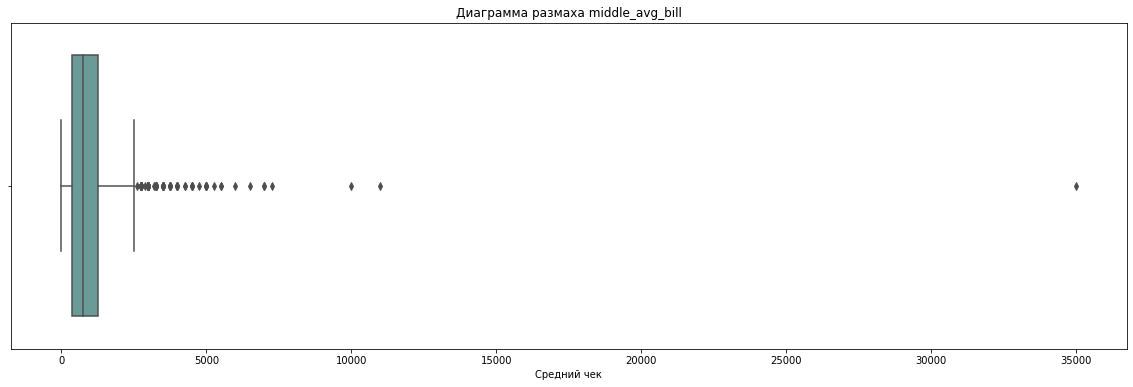

In [138]:
plt.figure(figsize=(20, 6))
# Построение диаграммы размаха для столбца middle_avg_bill
sns.boxplot(data=df,
           x='middle_avg_bill',color='#62A39F')
# Заголовок и подписи
plt.title('Диаграмма размаха middle_avg_bill')
plt.xlabel('Средний чек') 


Большинство заведений имеют средний чек в диапазоне от 375 до 1250. Однако присутствуют заведения с аномально высоким чеком, что приводит к большому стандартному отклонению и завышенному среднему значению. Для точного анализа рекомендуется либо удалить выбросы, либо использовать медианное значение как более устойчивую метрику.

In [139]:
# Фильтруем данные для заведений с категорией "Средний чек"
filtered_df = df[df['bill_category'] == 'Средний счёт']

# Создаем сводную таблицу по категории и названию заведения с агрегацией по среднему значению среднего чека
pivot_middle_avg_bill = pd.pivot_table(filtered_df, 
                                       values='middle_avg_bill',
                                       columns='bill_category',  # Для разных категорий
                                       index='district', 
                                       aggfunc='mean')

# Сортируем по одному из столбцов (например, для первой категории)
pivot_middle_avg_bill_sorted = pivot_middle_avg_bill.sort_values(by=pivot_middle_avg_bill.columns[0], ascending=False)

# Выводим отсортированную сводную таблицу
display(pivot_middle_avg_bill_sorted)


bill_category,Средний счёт
district,
Центральный административный округ,1191.057547
Западный административный округ,1053.225490
Северный административный округ,927.959627
Южный административный округ,834.398089
Северо-Западный административный округ,822.222930
Восточный административный округ,820.626923
Юго-Западный административный округ,792.561702
Северо-Восточный административный округ,716.611296
Юго-Восточный административный округ,654.097938


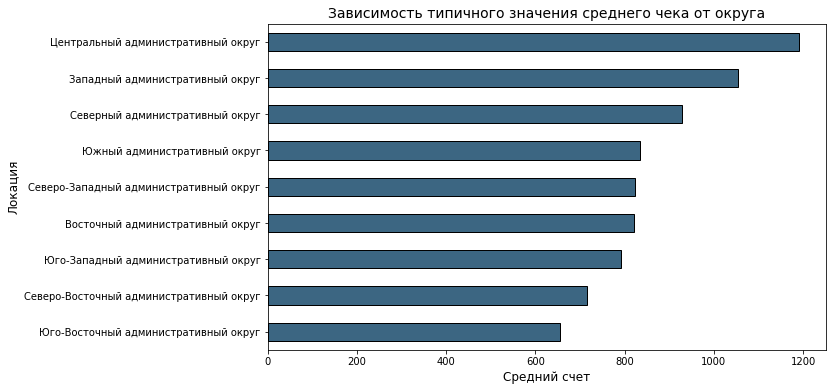

In [140]:
# Вычисляем средний чек по локациям (районам)
avg_bill = filtered_df.groupby('district')['middle_avg_bill'].mean()

# Сортируем по среднему чеку
avg_bill = avg_bill.sort_values()

# Строим график среднего чека по локациям
avg_bill.plot(kind='barh', figsize=(10, 6), color='#3C6682', edgecolor='black')
plt.title('Зависимость типичного значения среднего чека от округа', fontsize=14)
plt.xlabel('Средний счет', fontsize=12)
plt.ylabel('Локация', fontsize=12)
plt.show()


<font color='#777778'> Промежуточные выводы
    
- Высокие цены в Центральном и Западном округах. Это может свидетельствовать о высоком уровне заведений в этих районах, ориентированных на более обеспеченную аудиторию.
- Низкие цены в Юго-Восточном и Северо-Восточном округах: В этих округах наблюдаются более низкие значения для всех показателей. Это может означать, что заведения ориентированы на более широкий круг потребителей, возможно, с более доступной ценовой категорией.

</font>    

---

### Задача 9


Продолжим анализ среднего счета в зависимости от часов работы 

In [141]:
# Создаем сводную таблицу по категории и названию заведения с агрегацией по среднему значению среднего чека
pivot_hour = pd.pivot_table(df, 
                                       values='middle_avg_bill',
                                       columns='is_24_7',
                                       index='category', 
                                       aggfunc='mean')

# Сортируем по одному из столбцов (например, для первой категории)
pivot_middle_avg_bill_sorted =pivot_hour.sort_values(by=pivot_hour.columns[0], ascending=False)

# Выводим отсортированную сводную таблицу
display(pivot_hour)

is_24_7,False,True
category,,
"бар,паб",1347.690909,1183.684211
булочная,728.255814,360.000000
быстрое питание,486.836842,279.723404
кафе,722.354992,561.507937
кофейня,557.978610,1423.076923
пиццерия,802.635884,475.312500
ресторан,1352.050710,1656.944444
столовая,335.864407,312.500000


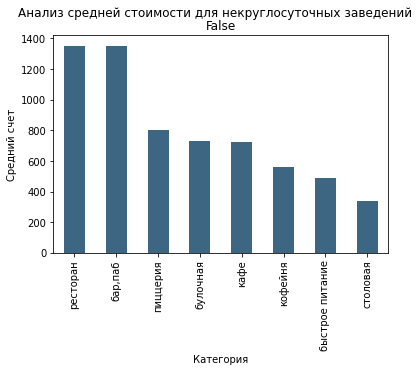

In [142]:
# Фильтруем данные для оставления только некруглосуточных заведений (is_24_7 == False)
df_f = df[df['is_24_7'] == False]

# Создаем сводную таблицу по категории с агрегацией по среднему значению среднего чека
pivot_hour_F = pd.pivot_table(df_f, 
                            values='middle_avg_bill',
                            columns='is_24_7',
                            index='category', 
                            aggfunc='mean')

# Сортируем по столбцу False (не круглосуточные заведения)
pivot_hour_F_sorted = pivot_hour_F.sort_values(by=False, ascending=False)

# Строим график
pivot_hour_F_sorted.plot(kind='bar',
                         subplots=True,
                         sharex=True,
                         sharey=False,
                         legend=False,
                         color='#3C6682',
                         title='Анализ средней стоимости для некруглосуточных заведений')

# Подписываем оси
plt.xlabel('Категория')
plt.ylabel('Средний счет')
plt.show()


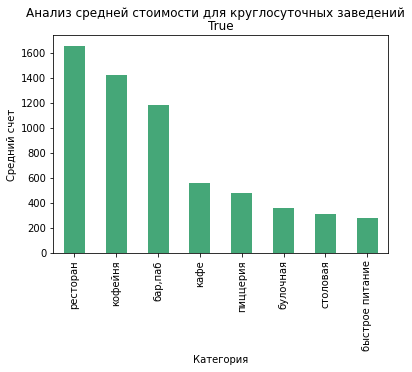

In [143]:
# Фильтруем данные для оставления только некруглосуточных заведений (is_24_7 == False)
df_t = df[df['is_24_7'] == True]

# Создаем сводную таблицу по категории с агрегацией по среднему значению среднего чека
pivot_hour_T = pd.pivot_table(df_t, 
                            values='middle_avg_bill',
                            columns='is_24_7',
                            index='category', 
                            aggfunc='mean')

# Сортируем по столбцу False (не круглосуточные заведения)
pivot_hour_T_sorted = pivot_hour_T.sort_values(by=True, ascending=False)

# Строим график
pivot_hour_T_sorted.plot(kind='bar',
                         subplots=True,
                         sharex=True,
                         sharey=False,
                         legend=False,
                         color='#45A778',
                         title='Анализ средней стоимости для круглосуточных заведений')

# Подписываем оси
plt.xlabel('Категория')
plt.ylabel('Средний счет')
plt.show()

<font color='#777778'> Промежуточные выводы:

Заведения, работающие круглосуточно, как правило, имеют более низкий средний показатель (например, для кофейн и ресторанов), что может свидетельствовать о более низких ценах или изменении клиентского спроса в ночное время. В то время как для некоторых категорий (например, для ресторанов) разница в среднем значении невелика или наоборот, для заведений, не работающих круглосуточно, наблюдается повышение этого показателя.

</font>    

---

### Промежуточный вывод


1. Кафе и рестораны доминируют на рынке общественного питания, составляя более 50% всех заведений, в то время как столовые и булочные имеют меньшую представленность.
2. Центральный административный округ Москвы лидирует по количеству заведений (27% всех заведений города).
3. Сетевые заведения составляют 38%, а несетевые — 62%. Большинство сетевых заведений распределены равномерно между категориями кафе, кофеен и ресторанов.
4. Большинство заведений имеют рейтинги в диапазоне 4.1–4.4, при этом некоторые заведения имеют экстремально низкие или высокие оценки.
5. Центральный и Западный округа имеют высокие средние значения для среднего чека, что может свидетельствовать о высоком уровне заведений, ориентированных на более обеспеченную аудиторию.
6. Наблюдаются выбросы в данных по количеству сидячих мест, особенно в кафе и ресторанах, где количество мест может значительно превышать 1000.Так же по среднему чеку: Большинство заведений имеют средний чек в диапазоне от 375 до 1250.
7. Заведения, работающие круглосуточно, как правило, имеют более низкий средний показатель (например, для кофейн и ресторанов), что может свидетельствовать о более низких ценах или изменении клиентского спроса в ночное время. В то время как для некоторых категорий (например, для ресторанов) разница в среднем значении невелика или наоборот, для заведений, не работающих круглосуточно, наблюдается повышение этого показателя.

Рекомендации:

- Для заведений в Центральном и Западном округах может быть целесообразно поддерживать высокие цены, ориентируясь на более обеспеченную аудиторию.
- В Юго-Восточных и Северо-Вочстоном округах можно продолжить придерживаться более доступной ценовой категории, привлекая более широкий круг потребителей.
- Важно продолжать развивать сетевые заведения в категориях кофейня и пиццерия, так как они популярны среди потребителей.
- В ресторанах и других более специализированных заведениях стоит обратить внимание на улучшение качества обслуживания и более точную настройку цен, чтобы повысить рейтинг.
- Рекомендуется исследовать, какие факторы влияют на высокие или низкие рейтинги, чтобы улучшить качество обслуживания в этих заведениях.


<h2 style="color: #62A39F;">  Детальное исследование пиццерий
</h2>


---

### Задача 1

Сколько всего пиццерий в датасете? В каких районах их больше всего? Вычислите долю пиццерий в каждом районе от общего количества заведений. Результат сопроводите подходящими визуализациями.

In [144]:
# Считаем количество пиццерий
pizza_df = df[df['category'] == 'пиццерия'].copy()
display(f'Всего количество пиццерий: {pizza_df.shape[0]}')

'Всего количество пиццерий: 633'

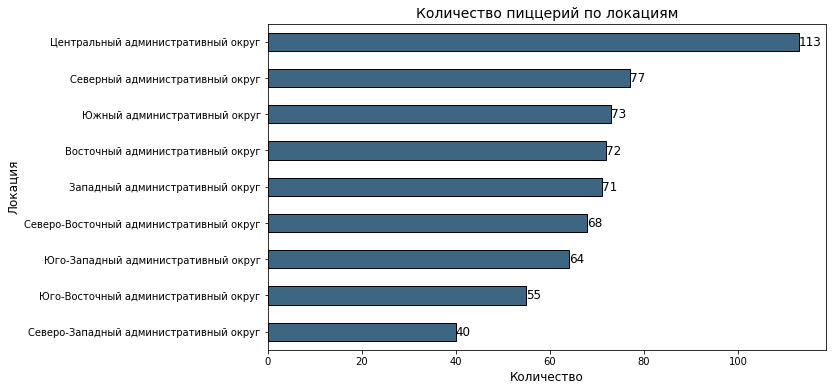

In [145]:
# Вычисляем количество пиццерий по локациям
pizza_count = pizza_df.groupby('district')['id'].count()

# Сортируем по количеству пиццерий
pizza_count_sorted = pizza_count.sort_values(ascending=True)

# Строим график
ax = pizza_count_sorted.plot(kind='barh', figsize=(10, 6), color='#3C6682', edgecolor='black')
plt.title('Количество пиццерий по локациям', fontsize=14)
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Локация', fontsize=12)

# Добавляем значения на график
for index, value in enumerate(pizza_count_sorted):
    ax.text(value, index, str(value), va='center', ha='left', fontsize=12, color='black')

plt.show()


,id,pizza_share
district,,
Северо-Западный административный округ,40,0.097800
Юго-Западный административный округ,64,0.090268
Восточный административный округ,72,0.090226
Северный административный округ,77,0.085556
Западный административный округ,71,0.083431
Южный административный округ,73,0.081839
Юго-Восточный административный округ,55,0.077031
Северо-Восточный административный округ,68,0.076319
Центральный административный округ,113,0.050401


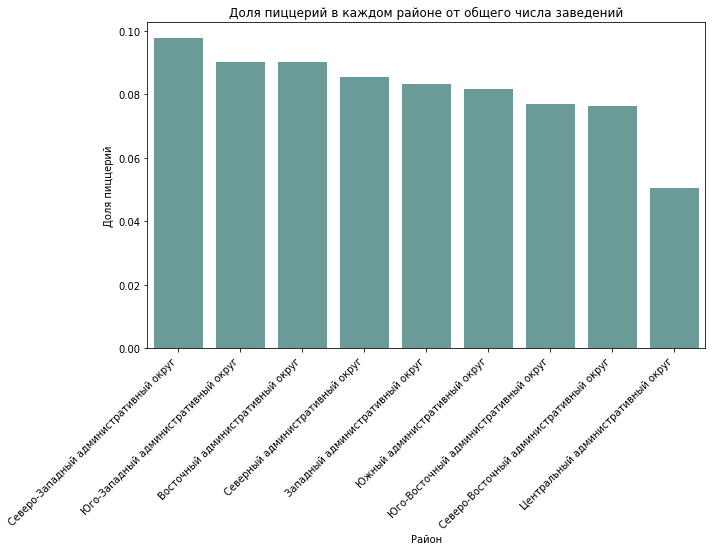

In [146]:
# Считаем общее количество заведений в каждом районе
total_count_by_district = df.groupby('district')['id'].count()

# Считаем общее количество пиццерий в каждом районе
total_count_pizza_by_district = pizza_df.groupby('district')['id'].count()

# Создаем сводную таблицу для пиццерий по районам
pivot_pizza = pd.pivot_table(pizza_df, 
                             values='id',
                             index='district', 
                             aggfunc='count')

# Вычисляем долю пиццерий в каждом районе от общего количества заведений (из df)
pivot_pizza['pizza_share'] = pivot_pizza['id'] / total_count_by_district

# Сортируем по доле пиццерий
pivot_pizza_sorted = pivot_pizza.sort_values(by='pizza_share', ascending=False)

# Выводим отсортированную сводную таблицу с долей пиццерий
display(pivot_pizza_sorted)

# Строим столбчатую диаграмму для доли пиццерий в каждом районе
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_pizza_sorted.index, y=pivot_pizza_sorted['pizza_share'], color='#62A39F')

# Заголовок и подписи осей
plt.title('Доля пиццерий в каждом районе от общего числа заведений')
plt.xlabel('Район')
plt.ylabel('Доля пиццерий')

# Поворот подписей для оси X
plt.xticks(rotation=45, ha='right')

# Отображаем график
plt.show()

<font color='#777778'> Промежуточные выводы
    
На основе доли пиццерий по районам, можно сделать следующие выводы:

- Всего в датасете представлено 633 пиццерии. Это позволяет утверждать, что пиццерии составляют значительную часть общего числа заведений. 
    
- Центральный административный округ лидирует по объему пиццерий. Это может свидетельствовать о высоком уровне концентрации пиццерий в центральной части города, что обусловлено высокой плотностью населения и большим количеством туристов.
- В Северо-Западном и Юго-Западном административных округах наблюдается наибольшая доля пиццерий среди заведений, что свидетельствует о высоком спросе на этот тип бизнеса в этих районах. 
- Центральный административный округ имеет наименьшую долю пиццерий, что может быть связано с более высокой концентрацией других типов заведений.
Рекомендации:
    
Районы с более высокой долей пиццерий могут быть интересными для бизнеса и маркетинговых стратегий, направленных на привлечение клиентов в пиццерии, поскольку здесь наблюдается высокий спрос на этот тип заведения.
Районы с более низкой долей пиццерий могут предложить возможности для увеличения присутствия пиццерий, если спрос на них будет расти, или для диверсификации бизнес-стратегий с учетом предпочтений клиентов.
</font>

---

### Задача 2

Дайте характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений? Результат сопроводите подходящими визуализациями.

In [147]:
# Рассчитываем среднее количество посадочных мест для пиццерий
average_seats_per_pizza = pizza_df['seats'].median()

# Выводим результат
display(f"Среднее количество посадочных мест в типовой пиццерии: {average_seats_per_pizza:.2f}")


'Среднее количество посадочных мест в типовой пиццерии: 55.00'

In [148]:
# Рассчитываем средний чек

filtered_df = df[(df['bill_category'] == 'Средний счёт') & (df['category'] == 'пиццерия') ]

# Создаем сводную таблицу по категории и названию заведения с агрегацией по среднему значению среднего чека
pivot_middle_avg_bill = pd.pivot_table(filtered_df, 
                                       values='middle_avg_bill',
                                       index='bill_category', 
                                       aggfunc='mean')

# Сортируем по одному из столбцов (например, для первой категории)
pivot_middle_avg_bill_sorted = pivot_middle_avg_bill.sort_values(by=pivot_middle_avg_bill.columns[0], ascending=False)

# Выводим отсортированную сводную таблицу
display(round(pivot_middle_avg_bill_sorted,2))

,middle_avg_bill
bill_category,
Средний счёт,789.38


In [149]:
# Рассчитываем средний рейтинг
average_rating = round(pizza_df['rating'].mean(),2)
display(f'Средний рейтинг пиццерий: {average_rating}')

'Средний рейтинг пиццерий: 4.3'

In [150]:
# Рассчитываем среднюю стоимость чашкуи кофе

# Создаем сводную таблицу по категории и названию заведения с агрегацией по среднему значению среднего чека
pivot_middle_avg_coffee_bill = pd.pivot_table(pizza_df, 
                                       values='middle_coffee_cup',
                                       index='category', 
                                       aggfunc='mean')

# Сортируем по одному из столбцов (например, для первой категории)
pivot_middle_avg_coffee_bill_sorted = pivot_middle_avg_coffee_bill.sort_values(by=pivot_middle_avg_coffee_bill.columns[0], ascending=False)

# Выводим отсортированную сводную таблицу
display(round(pivot_middle_avg_coffee_bill_sorted),2)

,middle_coffee_cup
category,
пиццерия,153.0


2

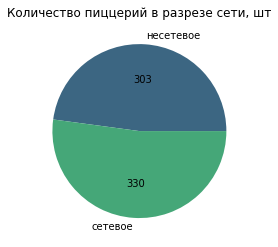

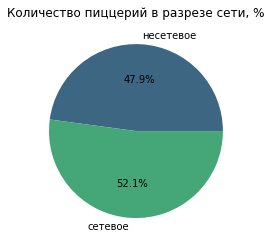

In [151]:
pizza_counts = pizza_df.groupby('chain').size().reset_index(name='count')

# Используем палитру 'viridis' для цветов
colors = ['#3C6682', '#45A778'] 

# Построение круговой диаграммы
ax = pizza_counts.plot(kind='pie',
       x='chain',
        labels=pizza_counts['chain'].replace({0: 'несетевое', 1: 'сетевое'}),  # Заменяем метки
        autopct=lambda p: '{:.0f}'.format(p * sum(pizza_counts['count']) / 100),           
        y='count',
        legend=False,
        colors=colors)
# Заголовок и подписи       
plt.title('Количество пиццерий в разрезе сети, шт')
# Убираем подписи осей
ax.set_ylabel('')  # Убираем подпись оси Y
ax.set_xlabel('')  # Убираем подпись оси X
plt.show()
# Построение круговой диаграммы в %
ax=pizza_counts.plot(kind='pie',
        x='chain',
        labels=pizza_counts['chain'].replace({0: 'несетевое', 1: 'сетевое'}),  # Заменяем метки
        autopct='%1.1f%%',           
        y='count',
        legend=False,
        colors=colors)
# Заголовок и подписи       
plt.title('Количество пиццерий в разрезе сети, %')
# Убираем подписи осей
ax.set_ylabel('')  # Убираем подпись оси Y
ax.set_xlabel('')  # Убираем подпись оси X
plt.show()

<font color='#777778'> Промежуточные выводы:
Количество пиццерий в датасете:


- Средний рейтинг пиццерий в датасете составляет 4.30. Это говорит о том, что в целом пиццерии получают высокие оценки от клиентов. Рейтинг выше 4.0 обычно считается хорошим, что подтверждает популярность и положительное восприятие этой категории заведений.
- Среднее количество посадочных мест в пиццериях составляет 84.25. Это предполагает, что типичная пиццерия имеет умеренное количество мест, подходящее как для небольшой, так и для средней по размеру аудитории.
- Средний счёт в пиццериях составляет 789. Это значение указывает на то, что пиццерии ориентированы на средний ценовой сегмент, при этом не являются слишком дорогими заведениями. Стоимость блюда в среднем в пределах доступного диапазона для большинства потребителей.
- Из 633 пиццерий 303 являются несетевыми, а 330 — сетевыми. Это говорит о том, что пиццерии в целом разделены довольно равномерно между сетевыми и несетевыми заведениями. Это может свидетельствовать о значительной популярности сетевых брендов, которые делают ставки на расширение сети, однако не менее популярны и независимые пиццерии.

Рекомендации:
- Пиццерии с высоким рейтингом: Для поддержания высокого рейтинга, пиццерии должны сосредоточиться на улучшении качества обслуживания, поддержании комфортной атмосферы и предложении качественного меню.
- Ценовая стратегия: Цена на пиво и капучино указывает на средний ценовой сегмент. Возможно, стоит изучить возможность повышения цен на премиальные продукты или создание специальных предложений для привлечения клиентов с разным уровнем дохода.
Анализ сетевых и несетевых пиццерий: Поскольку доля сетевых пиццерий и несетевых почти равна, стоит исследовать, как сетевые пиццерии могут использовать свои преимущества (бренд, маркетинг, закупки) для роста и увеличения доли на рынке.

</font>

---

### Задача 3

Изучите распределение сетевых и несетевых пиццерий в зависимости от округа Москвы. В каких округах меньше всего сетевых пиццерий? Результат сопроводите подходящими визуализациями.

In [152]:
# Строим сводную таблицу
pivot_pizza = pd.pivot_table(pizza_df,
                             values='id',  # Мы считаем количество пиццерий по id
                             index='district',  # Группируем по району
                             columns='chain',  # По типу сети
                             aggfunc='count',  # Используем count для подсчета записей
                             fill_value=0)  # Заменяем пропуски на 0

# Выводим сводную таблицу
display(pivot_pizza)

chain,0,1
district,,
Восточный административный округ,34,38
Западный административный округ,33,38
Северный административный округ,37,40
Северо-Восточный административный округ,32,36
Северо-Западный административный округ,18,22
Центральный административный округ,65,48
Юго-Восточный административный округ,26,29
Юго-Западный административный округ,26,38
Южный административный округ,32,41


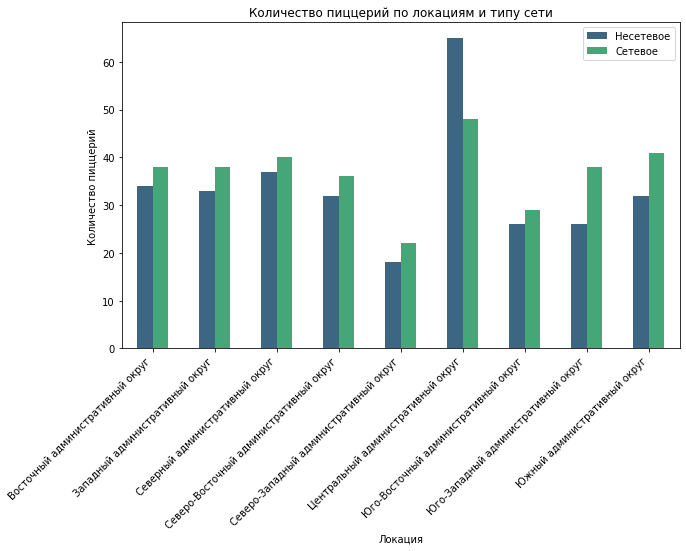

In [153]:
# Сбрасываем индекс, чтобы 'district' стал обычным столбцом
pivot_pizza_reset = pivot_pizza.reset_index()

# Переименуем столбцы для корректности
pivot_pizza_reset.columns = ['district', 'Несетевое', 'Сетевое']

# Строим столбчатую диаграмму
pivot_pizza_reset.plot(x='district', kind='bar', stacked=False, figsize=(10, 6), color=['#3C6682', '#45A778'])

# Заголовок и подписи осей
plt.title('Количество пиццерий по локациям и типу сети')
plt.xlabel('Локация')
plt.ylabel('Количество пиццерий')

# Поворот подписей для оси X
plt.xticks(rotation=45, ha='right')

# Отображаем график
plt.show()

<font color='#777778'> Промежуточные выводы:
    
В Центральном административном округе наибольшее количество заведений, как сетевых, так и независимых, в то время как в Северо-Западном округе наблюдается наименьшее количество заведений в обеих категориях. В большинстве районов количество сетевых заведений (значение "1" в столбце chain) примерно равно или чуть выше числа независимых заведений (значение "0").
</font>

---

### Промежуточный вывод

На основе проведенного анализа можно заключить, что пиццерии составляют значительную часть ресторанного рынка, при этом существует явная разница в концентрации этих заведений по районам города. Центральный административный округ является лидером по числу пиццерий, что связано с высокой плотностью населения и потоком туристов, однако доля пиццерий в этом районе ниже, чем в других округах, что может свидетельствовать о большем разнообразии типов заведений в центре города. В районах с высокой долей пиццерий, таких как Северо-Западный и Юго-Западный округа, наблюдается значительный спрос на этот тип бизнеса, что открывает возможности для дальнейшего развития.

Кроме того, пиццерии в целом имеют высокий рейтинг (в среднем 4.30), что подтверждает их популярность среди клиентов. Стоит отметить, что рынок пиццерий делится на сетевые и несетевые заведения почти поровну, что отражает разнообразие бизнес-моделей. Рекомендуется уделить внимание улучшению качества обслуживания в пиццериях с высоким рейтингом, а также продолжить развитие сетевых брендов, что может способствовать увеличению их рыночной доли. Для пиццерий в районах с меньшей долей этого типа заведения можно рассмотреть возможность улучшения маркетинга или расширения присутствия на этих рынках, где есть потенциал для роста спроса.

In [154]:
#Вывод объединенного и финального датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              8406 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  bill_category      8406 non-null   object 
 13  is_24_7            8406 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 1.2+ MB


<div style="border: 3px solid #305250; padding: 15px; width: 80%;">
<h2 style="color: #62A39F;"> Итоговый вывод и рекомендации
</h2>

Итоговый вывод: Данные о заведениях общественного питания показывают, что в Москве доминируют кафе и рестораны, составляющие более 50% всех заведений. Центральный административный округ лидирует по количеству заведений, в то время как регионы с более низким средним чеком, такие как Юго-Восточный и Северо-Восточный округа, имеют меньшую представленность. Сетевые заведения составляют 38%, а несетевые — 62%, причем сетевые заведения равномерно распределены между категориями кафе, кофеен и ресторанов. Несмотря на высокую концентрацию заведений в некоторых районах, данные о средних чеках и рейтингах свидетельствуют о большом разнообразии заведений по качеству и ценовой категории.

Рекомендации: Рекомендуется ориентироваться на более высокие ценовые сегменты в Центральном и Западном округах, где наблюдается высокое среднее значение среднего чека, и продолжать развивать сетевые заведения в категориях кофейни и пиццерии. Для более доступных районов, таких как Юго-Восточный и Северо-Восточный округа, следует предлагать конкурентоспособные цены, привлекая более широкий круг потребителей. Важно работать над повышением качества обслуживания в ресторанах и пиццериях для улучшения рейтингов, а также изучить факторы, влияющие на экстремальные оценки. В рамках ценовой стратегии для пиццерий стоит исследовать возможности для создания премиальных предложений и акций для разных категорий потребителей.
 </div>